# 一、神经网络

### 1.1 模型表示

神经网络模型建立在很多神经元之上，每一个神经元又是一个个学习模型。这些神经元（也叫激活单元，**activation unit**）采纳一些特征作为输出，并且根据本身的模型提供一个输出。下图是一个以逻辑回归模型作为自身学习模型的神经元示例，在神经网络中，参数又可被成为权重（**weight**）

<img src="images/p015.png" style="zoom:50%;" />

上图为一个3层的神经网络，第一层成为输入层（**Input Layer**），最后一层称为输出层（**Output Layer**），中间一层成为隐藏层（**Hidden Layers**）。我们为每一层都增加一个偏差单位（**bias unit**）：

$a_{i}^{\left( j \right)}$ 代表第$j$ 层的第 $i$ 个激活单元

${{\theta }^{\left( j \right)}}$代表从第 $j$ 层映射到第$ j+1$ 层时的权重的矩阵，例如${{\theta }^{\left( 1 \right)}}$代表从第一层映射到第二层的权重的矩阵

对于上图所示的模型，激活单元和输出分别表达为：
$$
\theta \cdot X=a
$$

$$
a_{1}^{(1)}=g(\Theta _{10}^{(1)}{{x}_{0}}+\Theta _{11}^{(1)}{{x}_{1}}+\Theta _{12}^{(1)}{{x}_{2}}+\Theta _{13}^{(1)}{{x}_{3}}) \\
a_{2}^{(1)}=g(\Theta _{20}^{(1)}{{x}_{0}}+\Theta _{21}^{(1)}{{x}_{1}}+\Theta _{22}^{(1)}{{x}_{2}}+\Theta _{23}^{(1)}{{x}_{3}})  \\
a_{3}^{(1)}=g(\Theta _{30}^{(1)}{{x}_{0}}+\Theta _{31}^{(1)}{{x}_{1}}+\Theta _{32}^{(1)}{{x}_{2}}+\Theta _{33}^{(1)}{{x}_{3}}) \\
{{h}_{\Theta }}(x)=g(\Theta _{10}^{(2)}a_{0}^{(2)}+\Theta _{11}^{(2)}a_{1}^{(2)}+\Theta _{12}^{(2)}a_{2}^{(2)}+\Theta _{13}^{(2)}a_{3}^{(2)})
$$

我们把这样从左到右的算法称为  **前向传播算法** ( **FORWARD PROPAGATION** ),  相当于多层逻辑回归

因为是梯度下降的，所以$a$是变化的，并且变得越来越厉害，所以这些更高级的特征值远比仅仅将 $x$次方厉害，也能更好的预测新数据

```python
#### 手搭NN
def dense(a_in,W,b,g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w,a_in)+b[j]                 #### x@y  等价于np.matmul(x,y) . 超过二维时dot,matmul会有区别
        a_out[j] = g(z)
    return a_out
```

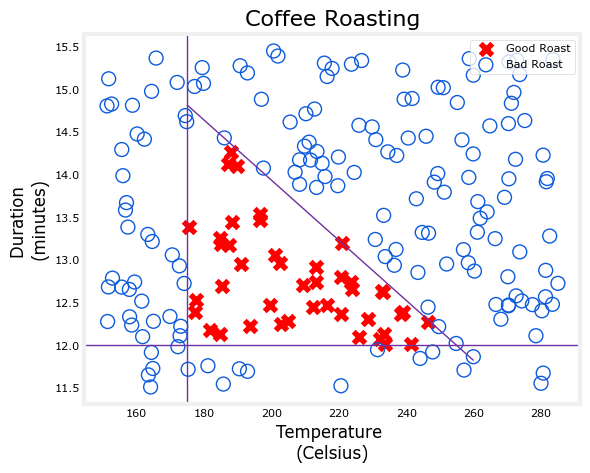

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)   #定义精确度
X,Y = load_coffee_data();  #X.shape, Y.shape
plt_roast(X,Y)

### 1.2 代价函数

$$
h_\theta\left(x\right)\in \mathbb{R}^{K} \quad \quad {\left({h_\theta}\left(x\right)\right)}_{i}={i}^{th} \text{output}
$$

$$
J(\theta) = -\frac{1}{m} \left[ \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{k} {y_k}^{(i)} \log {(h_\theta(x^{(i)}))}_k + \left( 1 - y_k^{(i)} \right) \log \left( 1- {\left( h_\theta \left( x^{(i)} \right) \right)}_k \right) \right]
+ \frac{\lambda}{2m} \sum\limits_{l=1}^{L-1} \sum\limits_{i=1}^{s_l} \sum\limits_{j=1}^{s_{l+1}} \left( \Theta_{ji}^{(l)} \right)^2
$$

这个看起来复杂很多的代价函数背后的思想还是一样的，我们希望通过代价函数来观察算法预测的结果与真实情况的误差有多大，唯一不同的是，对于每一行特征，我们都会给出$K$个预测，基本上我们可以利用循环，对每一行特征都预测$K$个不同结果，然后在利用循环在$K$个预测中选择可能性最高的一个，将其与$y$中的实际数据进行比较

正则化的那一项只是排除了每一层$\theta_0$后，每一层的$\theta$ 矩阵的和。最里层的循环$j$循环所有的行（由$s_{l+1}$  层的激活单元数决定），循环$i$则循环所有的列，由该层（$s_l$层）的激活单元数所决定。即：$h_\theta(x)$与真实值之间的距离为每个样本-每个类输出的加和，对参数进行**regularization**的**bias**项处理所有参数的平方和。

```python
# kera是python的一个库，现在已经被合并到tensorflow里面
loss = tf.keras.losses.BinaryCrossentropy()
=tf,keras.losses.MeanSquaredError()   # 均方误差
```

### 1.3激活函数

<img src="images/p014.png" style="zoom:60%;" />

二分类问题  sigmoid

回归问题    $g(z)=z$   不能所有层都用这个激活，其实这样就只有一层，等价于一个普通的多项式回归

非负回归  ReLU（隐藏层一般都用RelU） 速度更快，更为敏感（梯度下降的训练速度更快）

### 1.4 Adam optimization
比梯度下降速度快很多
每一个分量的学习率不同，自适应

In [35]:
# 采用LN方法归一化数据，通过预先计算数据的均值和方差，并在运行时
# 调用(input - mean) / sqrt(var)来实现将输入转换为以0为中心、标准差为1的分布
# LN中同层神经元输入拥有相同的均值和方差，不同的输入样本有不同的均值和方差
# 它可以提高神经网络的性能和稳定性，尤其是在自然语言处理领域中的循环神经网络
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  
Xn = norm_l(X)  

# 复制数据，以增加训练集的大小和减少训练周期的数量
Xt = np.tile(Xn,(1000,1))  #Xt.shape  (200000, 2)
Yt= np.tile(Y,(1000,1))    #Yt.shape  (200000, 1)
# 生成随机数
tf.random.set_seed(1234)  

# 设置神经网络层。  model.summary()  可用于查看模型细节
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='relu', name = 'layer1'),   
    Dense(1, activation='sigmoid', name = 'layer2')
])
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
W1, b1 = model.get_layer("layer1").get_weights()  #print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
W2, b2 = model.get_layer("layer2").get_weights()  #print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

# 定义代价函数和优化速率
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),   # 二分类交叉熵损失函数 -y*logf - (1-y)*log(1-f)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),   #所有分量的初始学习率为0.01 使用Adam自适应学习率加速学习
)

# 传入训练数据 ，Xt为第一层输入，Yt是最后一层输出， epochs是梯度下降中的下降速度。 调用梯度下降
model.fit( Xt,Yt,epochs=10,)

Epoch 1/10
6250/6250 [==============================] - 3s 533us/step - loss: 0.1601
Epoch 2/10
6250/6250 [==============================] - 3s 499us/step - loss: 0.1382
Epoch 3/10
6250/6250 [==============================] - 3s 546us/step - loss: 0.1379
Epoch 4/10
6250/6250 [==============================] - 3s 527us/step - loss: 0.1380
Epoch 5/10
6250/6250 [==============================] - 3s 496us/step - loss: 0.1378
Epoch 6/10
6250/6250 [==============================] - 3s 505us/step - loss: 0.1378
Epoch 7/10
6250/6250 [==============================] - 3s 508us/step - loss: 0.1378
Epoch 8/10
6250/6250 [==============================] - 3s 539us/step - loss: 0.1376
Epoch 9/10
6250/6250 [==============================] - 4s 560us/step - loss: 0.1377
Epoch 10/10
6250/6250 [==============================] - 3s 527us/step - loss: 0.1377


In [36]:
# 训练结束后，目标函数的系数已经更新
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()

# 进行预测
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]
])   # negative example
X_testn = norm_l(X_test)  # 由于训练数据已经规范化过，因此预测的测试数据也要进行规范化
predictions = model.predict(X_testn)   
print("predictions = \n", predictions)
# 输出预测结果
yhat = np.zeros_like(predictions)

# for i in range(len(predictions)):
#     if predictions[i] >= 0.5:  # 阈值
#         yhat[i] = 1
#     else:
#         yhat[i] = 0
yhat = (predictions >= 0.5).astype(int)  #与上注释的代码等价， astype()的输出为非0即1
print(f"decisions = \n{yhat}")

predictions = 
 [[8.38e-01]
 [9.60e-25]]
decisions = 
[[1]
 [0]]


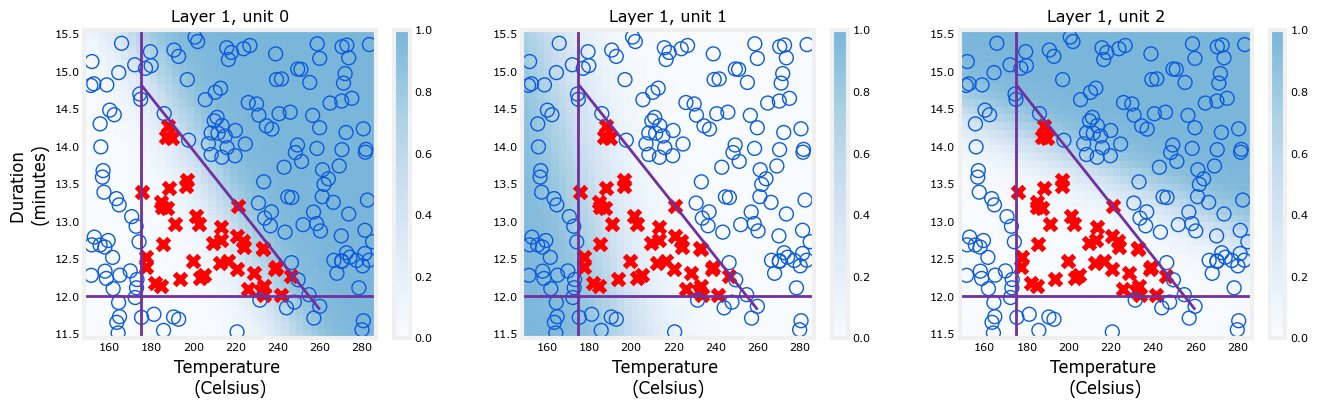

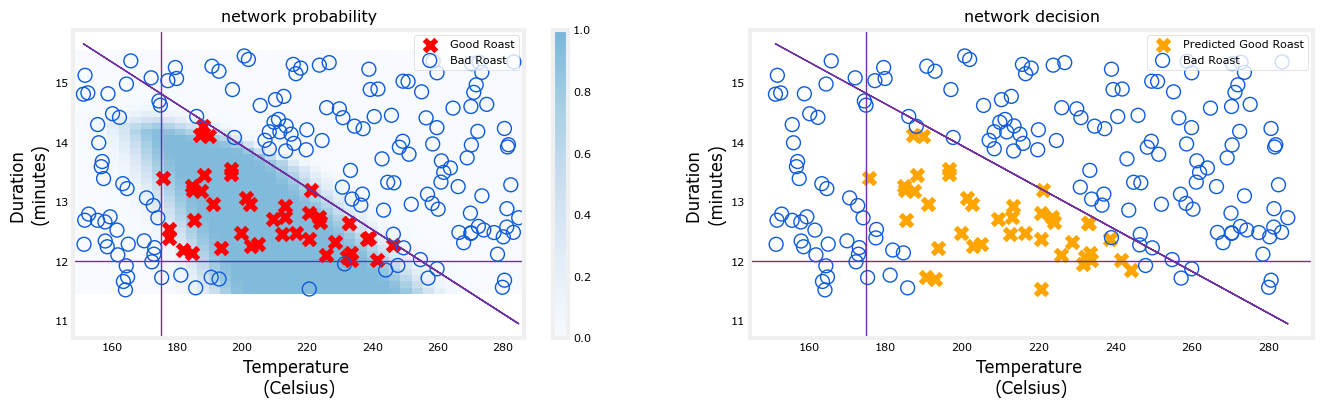

In [37]:
# 画出不同 unit的作用
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)  
# 画出最后的结果
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)

# 二、 多分类 SoftMAX
<center>  <img  src="./images/p013.png" width="600" />  </center>

loss **(只计算其中的一个)**
$$
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
$$

Now the cost is:
$$
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}
$$

**需要格外关注舍入误差带来的影响**， 因而对最后一层选择了linear激活函数，并且在输出函数中加入`from_logits=True`

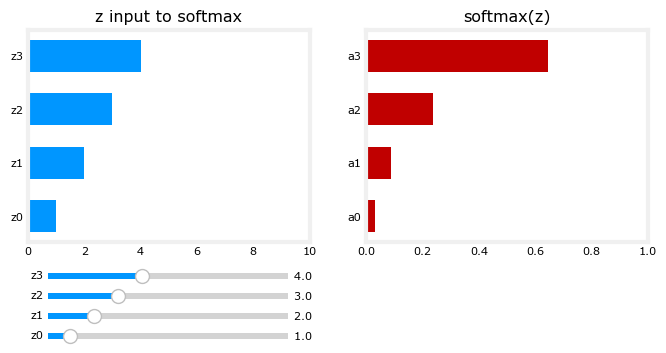

Epoch 1/10
63/63 [==============================] - 0s 691us/step - loss: 0.8152
Epoch 2/10
63/63 [==============================] - 0s 691us/step - loss: 0.2715
Epoch 3/10
63/63 [==============================] - 0s 707us/step - loss: 0.1231
Epoch 4/10
63/63 [==============================] - 0s 691us/step - loss: 0.0777
Epoch 5/10
63/63 [==============================] - 0s 707us/step - loss: 0.0615
Epoch 6/10
63/63 [==============================] - 0s 699us/step - loss: 0.0521
Epoch 7/10
63/63 [==============================] - 0s 723us/step - loss: 0.0463
Epoch 8/10
63/63 [==============================] - 0s 755us/step - loss: 0.0422
Epoch 9/10
63/63 [==============================] - 0s 765us/step - loss: 0.0385
Epoch 10/10
63/63 [==============================] - 0s 733us/step - loss: 0.0358


In [38]:
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
from lab_utils_softmax import plt_softmax

def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)
plt.close("all")
plt_softmax(my_softmax)
# 采用随机生成树来模拟
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X2_train, y2_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)
# 设置模型
model = Sequential([ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        #Dense(4, activation = 'softmax')    # 多分类激活函数, 改用SparseCategoricalCrossentropy(from_logits=True)可以减少精度损失
        Dense(4, activation = 'linear')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #多分类代价函数
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X2_train,y2_train,epochs=10)

In [39]:
p_preferred = model.predict(X2_train)
print(p_preferred [:2])  
print('\n');
sm_preferred = tf.nn.softmax(p_preferred).numpy()  #转化为概率，只输出两个
print(f"two example output vectors:\n {sm_preferred[:2]}")
print('\n');
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[[-1.62 -0.82  3.7  -1.73]
 [ 5.29 -0.06 -5.46 -6.87]]


two example output vectors:
 [[4.78e-03 1.07e-02 9.80e-01 4.27e-03]
 [9.95e-01 4.71e-03 2.13e-05 5.19e-06]]


[-1.62 -0.82  3.7  -1.73], category: 2
[ 5.29 -0.06 -5.46 -6.87], category: 0
[ 3.7   0.35 -4.16 -5.34], category: 0
[-2.33  4.59 -2.53 -1.51], category: 1
[ 0.29 -1.77  6.71 -5.12], category: 2


# 三、 多输出分类 multi-lable classfication

分别检测不合理，应该同时检测

![](images/p012.png)

# 四、 卷积神经网络 convolutional layer

每个卷积层都只训练数据的切片而不是整个数据，不同神经元之间交叉训练到相同数据集

![](images/p011.png)

# 五、 逻辑表达

下图的神经元（三个权重分别为-30，20，20）可以被视为作用同于逻辑与（**AND**）：

![](images/p009.png)

下图的神经元（三个权重分别为-10，20，20）可以被视为作用等同于逻辑或（**OR**）：

![](images/p008.png)

下图的神经元（两个权重分别为 10，-20）可以被视为作用等同于逻辑非（**NOT**）：

![](images/p007.png)